# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


### Preliminary Statistics

Since there are no null values we can begin with analysing our key variables. I am interested in exploring influence of **crime rate, presence of Non-retail businesses, Average rooms per house, Pupil-Teacher ratio**, and **Lower status of population** on the **Median value of houses** in Boston. We will begin with performing summary statistics to explore the centrality of the data. In order to make it easier we will rename the column names to something more accessible.

       Crime_Rate  Industrial_Region  Rooms_Per_House  Pupil_Teacher_Ratio  \
count  333.000000         333.000000       333.000000           333.000000   
mean     3.360341          11.293483         6.265619            18.448048   
std      7.352272           6.998123         0.703952             2.151821   
min      0.006320           0.740000         3.561000            12.600000   
25%      0.078960           5.130000         5.884000            17.400000   
50%      0.261690           9.900000         6.202000            19.000000   
75%      3.678220          18.100000         6.595000            20.200000   
max     73.534100          27.740000         8.725000            21.200000   

       Lower_Status_Population  Median_Property_Value  
count               333.000000             333.000000  
mean                 12.515435              22.768769  
std                   7.067781               9.173468  
min                   1.730000               5.000000  
25%              

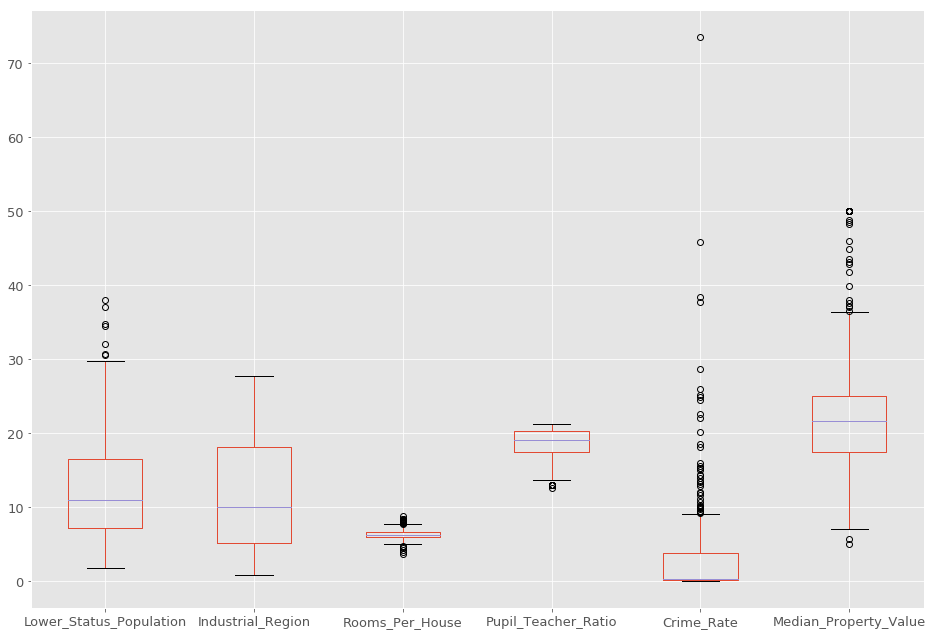

In [6]:
df.columns = ['ID', 'Crime_Rate', 'zn', 'Industrial_Region', 'chas', 'nox', 'Rooms_Per_House', 'age', 'dis', 'rad',
              'tax', 'Pupil_Teacher_Ratio', 'black', 'Lower_Status_Population', 'Median_Property_Value']


print(df.iloc[:,[1,3, 6, 11, 13, 14]].describe()) 

print(df.iloc[:,[13,3, 6, 11, 1, 14]].plot.box(figsize=(16,11), fontsize = 13))

We can see that Median Property Value shows Skewness, in order to get a better idea of it Distribution we can plot a histogram.

Median Property Value shows a slight positive skewness of 1.1225


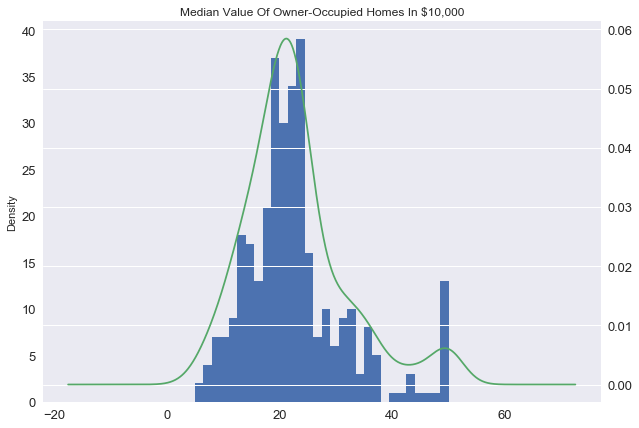

In [7]:
plt.style.use('seaborn')


df.Median_Property_Value.plot(title='median value of owner-occupied homes in $10,000'.title(), 
                              fontsize = 13, figsize=(10,7), kind='hist',  bins=30)



df.Median_Property_Value.plot(kind='kde', fontsize = 13, secondary_y=True)
print("Median Property Value shows a slight positive skewness of", round(df.Median_Property_Value.skew(), 4))



Median Property value shows a positive skew with a valuye of 1.1225. We can see that most properties have median value of around \\$ 20,0000 and the Kernel Density Estimate (EDE) shows an increase in ownership of properties with median value of \\$ 50,000.

We can next test to see if there is any relationship between number of houses and lower status of population in the median value of properties.

In [8]:
'''
Will use this code when appropriate


df.plot.scatter('Lower_Status_Population', 'Median_Property_Value', 
                 title='Lower Status Population', c = 'Industrial_Region', s = df['Industrial_Region'], colormap = 'plasma'),
df.plot.scatter('Rooms_Per_House', 'Median_Property_Value',
                 title='Average Rooms Per House', c = 'Industrial_Region', s = df['Industrial_Region'], colormap = 'winter')
'''

"\nWill use this code when appropriate\n\n\ndf.plot.scatter('Lower_Status_Population', 'Median_Property_Value', \n                 title='Lower Status Population', c = 'Industrial_Region', s = df['Industrial_Region'], colormap = 'plasma'),\ndf.plot.scatter('Rooms_Per_House', 'Median_Property_Value',\n                 title='Average Rooms Per House', c = 'Industrial_Region', s = df['Industrial_Region'], colormap = 'winter')\n"

The correlation coefficient with status of popuation is -0.7386
The correlation coefficient with rooms per house is 0.6896


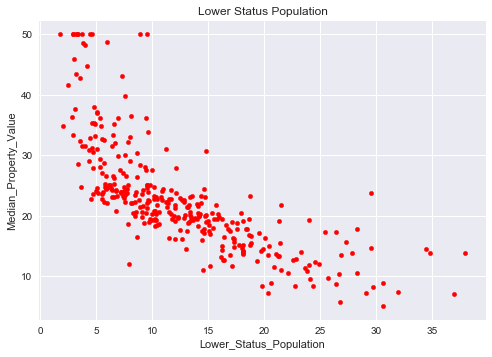

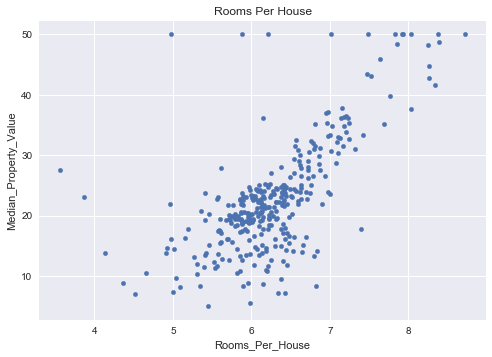

In [9]:
plt.style.use('seaborn')


df.plot.scatter('Lower_Status_Population', 'Median_Property_Value',
                 title='Lower Status Population', color = 'red')

print("The correlation coefficient with status of popuation is",  
       df.Lower_Status_Population.corr(df.Median_Property_Value).round(4))



df.plot.scatter('Rooms_Per_House', 'Median_Property_Value',
                 title='Rooms Per House')

print("The correlation coefficient with rooms per house is",  
       df.Rooms_Per_House.corr(df.Median_Property_Value).round(4))


The scatter plot suggest a strong negative relationship (corr of -0.7386) between median value of properties and the status of the population and a positive relationship ( corr of 0.68) between rooms per houses and the value of properties. In order to understand the relationship further we can create subsets of our data and get new plots on the data.


## Subsetting data for relationship with status of population.


In order to understand the relationship with status of population we can subset our data based on the crime rate. Before subsetting we will carry out a correlation matrix to understand the relationship that exist between different variables. 

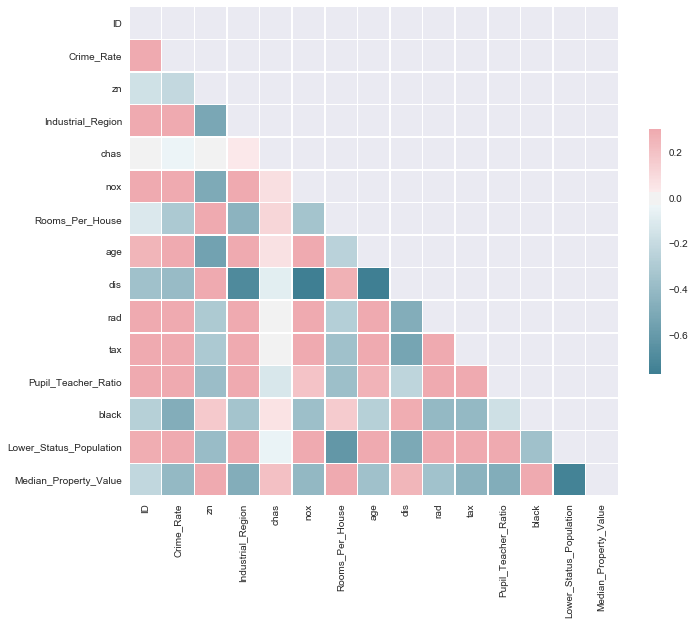

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr = df.corr()

# Mask the upper triangle of the matrix with zero values
# To do this we need a array of zeros with the same shape as corr
# We use the zeros_like method and give a specify a dtype of bool as we only need zero if there is a corr value
mask = np.zeros_like(corr, dtype=np.bool)

# The next triu function returns values for only the upper half of the triangle 
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



From the correlation matrix we can see that there are significant levels of correlation between crim and these variables:

tax positive correlation coefficient
lstat positive correlation coefficient
Some scatter plots between these pairs of predictors:

To simplify the subsetting of data I will assume that a suburb has a high crime rate if the crime rate value for that location falls on the 90th percentile value. We need to first calculate the 90th percentile value and then we can pass a function to group data based on that.


In [11]:

print (" The 90th percentile value for crime rate is",  df.Crime_Rate.quantile(0.90))


 The 90th percentile value for crime rate is 9.958202


In [18]:
# create a high crime subset as named hc
hc = df[df.Crime_Rate > 9.958202]

# create low crime subset as named lc
lc = df[df.Crime_Rate < 9.958202]

df.loc[df["Crime_Rate"] > 9.958202, "Crime"] = "High Crime Region"
df.loc[df["Crime_Rate"] <= 9.958202, "Crime"] = "Low Crime Region"

print(hc.iloc[:,[13, 14]].describe(),'\n \n', lc.iloc[:,[13, 14]].describe() ) 

       Lower_Status_Population  Median_Property_Value
count                34.000000              34.000000
mean                 23.112353              12.211765
std                   6.823800               5.221504
min                  12.130000               5.000000
25%                  18.310000               8.475000
50%                  22.990000              10.850000
75%                  26.737500              14.050000
max                  37.970000              27.900000 
 
        Lower_Status_Population  Median_Property_Value
count               299.000000             299.000000
mean                 11.310435              23.969231
std                   6.018923               8.750593
min                   1.730000               8.100000
25%                   6.635000              18.850000
50%                  10.160000              22.200000
75%                  14.695000              26.550000
max                  34.410000              50.000000


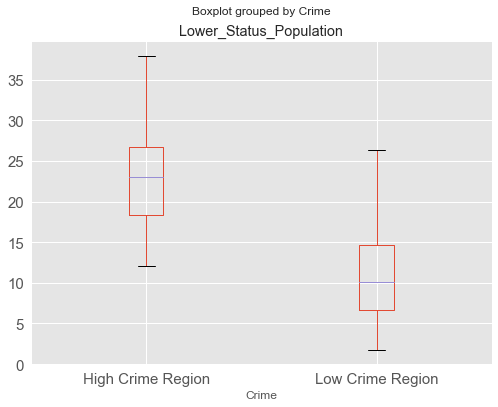

In [22]:
plt.style.use('ggplot')
df.boxplot(column=['Lower_Status_Population'], by='Crime', fontsize = 15, figsize = (8,6))


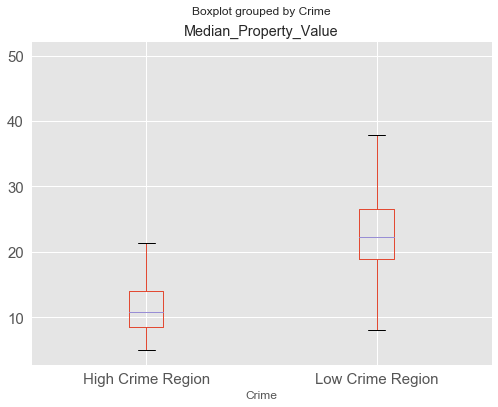

In [23]:
df.boxplot(column=['Median_Property_Value'], by='Crime', fontsize = 15, figsize = (8,6))

## Conclusion:


We can draw the conclusion that people from lower status of population are more likely to live in areas with higher crime rate (median proportion of 22.9 compared of median of 10.16 for those living in low crime area)

We can also observe that in high crime regions have a lower property value, with median of around 10.85 compared to median of 22.2 for low crime region. 